In [4]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [10]:
n_q = 8
n = n_q
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [11]:
for j in range(n):
    qc_output.measure(j,j)

In [12]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

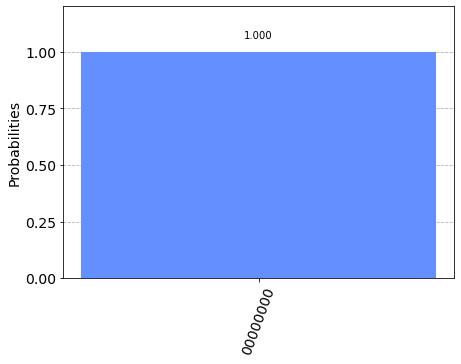

In [13]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

In [28]:
m = 6 #liczba qubitów
qc_encode6 = QuantumCircuit(m,m)
qc_encode6.x(3)
qc_encode6.barrier()

for j in range(m):
    qc_encode6.measure(j,j)

In [29]:
qc_encode6.draw()

░ ┌─┐               
q_0: ──────░─┤M├───────────────
           ░ └╥┘┌─┐            
q_1: ──────░──╫─┤M├────────────
           ░  ║ └╥┘┌─┐         
q_2: ──────░──╫──╫─┤M├─────────
     ┌───┐ ░  ║  ║ └╥┘┌─┐      
q_3: ┤ X ├─░──╫──╫──╫─┤M├──────
     └───┘ ░  ║  ║  ║ └╥┘┌─┐   
q_4: ──────░──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║ └╥┘┌─┐
q_5: ──────░──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║ └╥┘
c: 6/═════════╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5

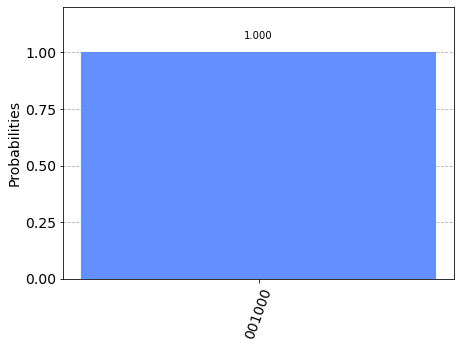

In [31]:
qobj = assemble(qc_encode6)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [63]:
qc_cnot = QuantumCircuit(5,2)
qc_cnot.x(0)
qc_cnot.x(1)
qc_cnot.x(2)
qc_cnot.barrier()
qc_cnot.cx(0,3)
qc_cnot.cx(1,3)
qc_cnot.cx(2,3)
qc_cnot.ccx(0,1,4)
qc_cnot.ccx(0,2,4)
qc_cnot.ccx(1,2,4)
qc_cnot.barrier()
qc_cnot.measure(3,0)
qc_cnot.measure(4,1)
qc_cnot.draw()

┌───┐ ░                                ░       
q_0: ┤ X ├─░───■──────────────■────■────────░───────
     ├───┤ ░   │              │    │        ░       
q_1: ┤ X ├─░───┼────■─────────■────┼────■───░───────
     ├───┤ ░   │    │         │    │    │   ░       
q_2: ┤ X ├─░───┼────┼────■────┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐  │    │    │   ░ ┌─┐   
q_3: ──────░─┤ X ├┤ X ├┤ X ├──┼────┼────┼───░─┤M├───
           ░ └───┘└───┘└───┘┌─┴─┐┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐
q_4: ──────░────────────────┤ X ├┤ X ├┤ X ├─░──╫─┤M├
           ░                └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════════╩══╩═
                                               0  1

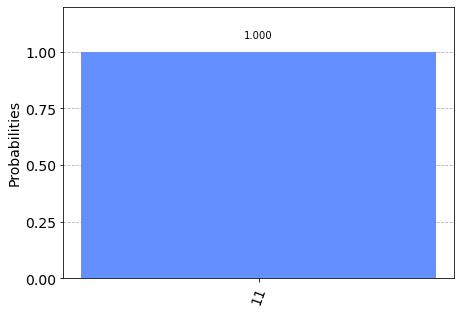

In [64]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_cnot)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)